## Análisis de datos de Covid 19 Tweets

### Tareas

- Procesamiento de texto
- Análisis de los sentimientos
- Extracción de palabras clave
- Extracción de entidades


In [1]:
### Paquete EDA 
import pandas as pd

In [2]:
# Paquete de Visualizacion Datos
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ocultando warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargando Dataset en un DF
df = pd.read_csv("data/covid19_tweets.csv")

In [5]:
#Observando DF
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Iranian Community Romania,NaN,NaN,2020-06-10 17:13:38,573,1138,18205,False,2021-03-29 10:27:17,"#Iran-#Covid19 ""#vaccination""a weapon to eradi...","['Iran', 'Covid19', 'vaccination']",Twitter Web App,False
1,Annalisa Klebers,"New York, USA","Anchor @News12NJ, @News12CT, @AlticeUSA Email:...",2018-10-15 17:29:13,948,453,3626,False,2021-03-29 10:27:05,COVID ALERT: Draft of WHO-China report obtaine...,NaN,Twitter for iPhone,False
2,Radio Misfits,United States,"Great Talk Radio Isn't Dead, It Just Moved To ...",2014-05-24 15:30:03,23773,19707,16037,False,2021-03-29 10:27:02,#TheGameShowShow EP102: PATIENCE IS A VIRTUE w...,"['TheGameShowShow', 'NSFWAF']",SimplyCast,False
3,phoebesaid,"Detroit, MI",Detroit Free Press autos reporter covering peo...,2012-08-11 06:11:35,3381,772,11754,True,2021-03-29 10:27:01,Exclusive: @UAW holds strong in 2020 among due...,['COVID19'],Twitter Web App,False
4,Shahid Anwar,NaN,NaN,2013-08-19 17:53:54,15,159,394,False,2021-03-29 10:26:53,@GHMCOnline I noticed that in many localities ...,NaN,Twitter for Android,False


### Tareas
- Prepocesamiento de texto

In [6]:
#Chequando las columnas
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [7]:
#Tipo de Datos de las columnas
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [8]:
#Fuente de donde vienen los twitters
df['source'].unique()

array(['Twitter Web App', 'Twitter for iPhone', 'SimplyCast',
       'Twitter for Android', 'Twitterrific for iOS', 'IFTTT',
       'COVID19-Updates', 'Sprout Social', 'TweetDeck', 'Hootsuite Inc.',
       'Pardot', 'Twitter for iPad', 'Missinglettr', 'GlobalPandemic.NET',
       'Twitter Media Studio - LiveCut', 'Buffer', 'Instagram',
       'Revive Social App', 'Bitly', 'LinkedIn', 'stocktitan',
       'Cheap Bots, Done Quick!', 'UNIAN.info', 'UNIAN Info', 'HubSpot',
       'Scoop.it', 'Twitter Media Studio', 'Smarp.', 'WantedBestSell',
       nan, 'Paper.li', 'SocialNewsDesk', 'SocialPilot.co',
       'Microsoft Power Platform', 'dlvr.it', 'twitter-fu', 'Sendible',
       'Zoho Social', 'Orlo', 'HN_Comments', 'OneUp App', 'Echobox',
       'Khoros Publishing', 'Falcon Social Media Management ',
       'coronaData_Test', 'Scompler', 'Crowdfire App', 'Sprinklr',
       'Twitter for Advertisers', 'The Social Jukebox',
       'Social Press Kit', '92 News HD', 'Nonli', 'Prothom Alo Engli

In [10]:
#Conteo de las fuentes de donde vienen los twitters
df['source'].value_counts()

Twitter Web App         387
Twitter for Android     206
Twitter for iPhone      144
TweetDeck                52
Hootsuite Inc.           50
                       ... 
Twitterrific for iOS      1
SimplyCast                1
Linky for iOS             1
SurveyCircle Updates      1
92 News HD                1
Name: source, Length: 62, dtype: int64

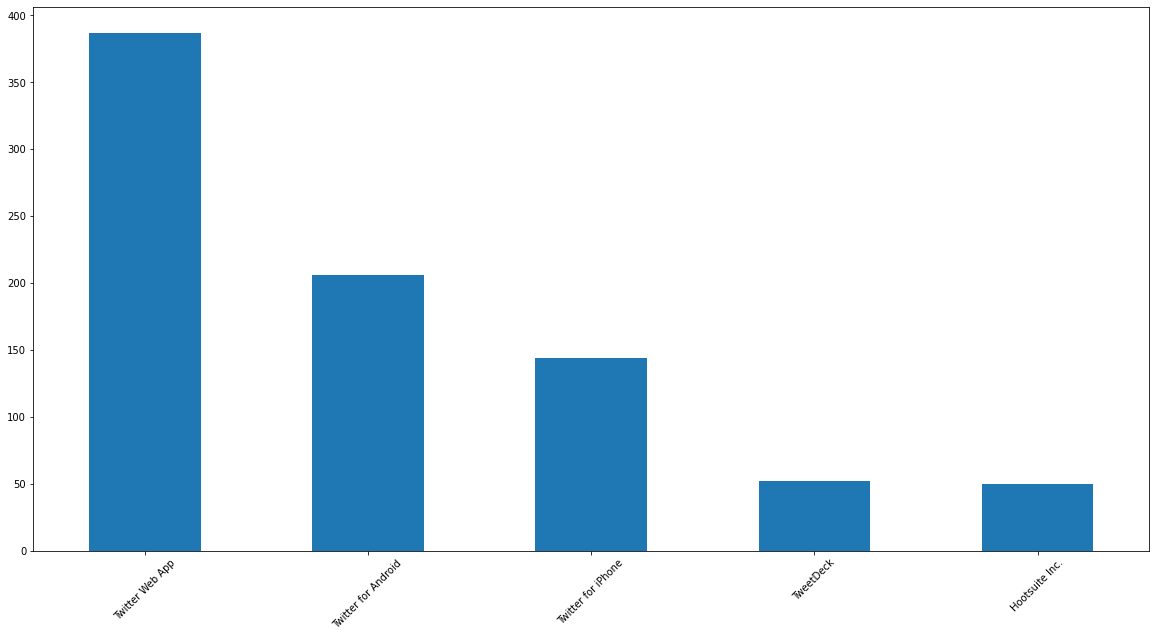

In [13]:
#Grafico de las 5 mayores fuentes de donde vienen los twitter
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(5).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

##### Analisis de los texto de los Twitter

In [15]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Carga del Paquete de limpieza de texto
import neattext.functions as nfx

In [17]:
#Metodos / Atributos del Paquete
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [19]:
#Viendo un texto del twitter posicion 3
df['text'].iloc[2]

'#TheGameShowShow EP102: PATIENCE IS A VIRTUE w/ @peoplecallmeJAZ @andersonlawfer @JohnnyMoDigital \n\n#NSFWAF #Chicago #Comedy #TechnicalDifficulties #JohnnyMoDoesTheNewsForYou #Podcast #ChakaKhan #COVID19 #AdultsOnly #MoreProfanity #AndStuff https://t.co/6F4gPjeld0'

#### Remocion de Ruido
- Remocion de menciones/userhandles
- Remocion de hashtags
- Remocion urls
- Remocion emojis
- Remocion de caracteres especiales

In [20]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Iranian Community Romania,NaN,NaN,2020-06-10 17:13:38,573,1138,18205,False,2021-03-29 10:27:17,"#Iran-#Covid19 ""#vaccination""a weapon to eradi...","['Iran', 'Covid19', 'vaccination']",Twitter Web App,False
1,Annalisa Klebers,"New York, USA","Anchor @News12NJ, @News12CT, @AlticeUSA Email:...",2018-10-15 17:29:13,948,453,3626,False,2021-03-29 10:27:05,COVID ALERT: Draft of WHO-China report obtaine...,NaN,Twitter for iPhone,False
2,Radio Misfits,United States,"Great Talk Radio Isn't Dead, It Just Moved To ...",2014-05-24 15:30:03,23773,19707,16037,False,2021-03-29 10:27:02,#TheGameShowShow EP102: PATIENCE IS A VIRTUE w...,"['TheGameShowShow', 'NSFWAF']",SimplyCast,False
3,phoebesaid,"Detroit, MI",Detroit Free Press autos reporter covering peo...,2012-08-11 06:11:35,3381,772,11754,True,2021-03-29 10:27:01,Exclusive: @UAW holds strong in 2020 among due...,['COVID19'],Twitter Web App,False
4,Shahid Anwar,NaN,NaN,2013-08-19 17:53:54,15,159,394,False,2021-03-29 10:26:53,@GHMCOnline I noticed that in many localities ...,NaN,Twitter for Android,False


In [21]:
df['text'].apply(nfx.extract_hashtags)

0                       [#Iran-#Covid19, #vaccination"a]
1                         [#COVID19, #Coronavirus, #WHO]
2      [#TheGameShowShow, #NSFWAF, #Chicago, #Comedy,...
3                                             [#COVID19]
4                                             [#COVID19]
                             ...                        
995                            [#COVID19, #UniteToFight]
996            [#BorisAffair, #coronapandemic, #COVID19]
997             [#POLL:, #WFH, #remoteworking, #COVID19]
998    [#baytna_baytkon, #baytna, #events, #barouk, #...
999    [#NCOC, #PunjabTeachersDharnaDay11, #AsadUmar,...
Name: text, Length: 1000, dtype: object

In [22]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [23]:
df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,"[#Iran-#Covid19, #vaccination""a]","['Iran', 'Covid19', 'vaccination']"
1,"[#COVID19, #Coronavirus, #WHO]",NaN
2,"[#TheGameShowShow, #NSFWAF, #Chicago, #Comedy,...","['TheGameShowShow', 'NSFWAF']"
3,[#COVID19],['COVID19']
4,[#COVID19],NaN
...,...,...
995,"[#COVID19, #UniteToFight]",['COVID19']
996,"[#BorisAffair, #coronapandemic, #COVID19]",NaN
997,"[#POLL:, #WFH, #remoteworking, #COVID19]",['POLL']
998,"[#baytna_baytkon, #baytna, #events, #barouk, #...",NaN


In [24]:
# Limpiando el campo Text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [25]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"#Iran-#Covid19 ""#vaccination""a weapon to eradi...",""" weapon to eradicate rebellion generation...."
1,COVID ALERT: Draft of WHO-China report obtaine...,COVID ALERT: Draft of WHO-China report obtaine...
2,#TheGameShowShow EP102: PATIENCE IS A VIRTUE w...,EP102: PATIENCE IS A VIRTUE w/ @peoplecallme...
3,Exclusive: @UAW holds strong in 2020 among due...,Exclusive: @UAW holds strong in 2020 among due...
4,@GHMCOnline I noticed that in many localities ...,@GHMCOnline I noticed that in many localities ...
...,...,...
995,"""Uganda has been very successful at fighting #...","""Uganda has been very successful at fighting ..."
996,@No431onthelist @jbroadbent @DavidHenigUK And?...,@No431onthelist @jbroadbent @DavidHenigUK And?...
997,"#POLL: Work from home, has changed our lifesty...","Work from home, has changed our lifestyles. ..."
998,Stop the video and let us know what you miss t...,Stop the video and let us know what you miss t...


In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [27]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"#Iran-#Covid19 ""#vaccination""a weapon to eradi...",""" weapon to eradicate rebellion generation...."
1,COVID ALERT: Draft of WHO-China report obtaine...,COVID ALERT: Draft of WHO-China report obtaine...
2,#TheGameShowShow EP102: PATIENCE IS A VIRTUE w...,EP102: PATIENCE IS A VIRTUE w/ \n\n ...
3,Exclusive: @UAW holds strong in 2020 among due...,Exclusive: holds strong in 2020 among dues-p...
4,@GHMCOnline I noticed that in many localities ...,I noticed that in many localities of old cit...
...,...,...
995,"""Uganda has been very successful at fighting #...","""Uganda has been very successful at fighting ..."
996,@No431onthelist @jbroadbent @DavidHenigUK And?...,And? was sooo distracted by his multip...
997,"#POLL: Work from home, has changed our lifesty...","Work from home, has changed our lifestyles. ..."
998,Stop the video and let us know what you miss t...,Stop the video and let us know what you miss t...


In [28]:
df['clean_tweet'].iloc[2]

'  EP102: PATIENCE IS A VIRTUE w/       \n\n                      https://t.co/6F4gPjeld0'

In [29]:
# Limpiando Texto: Quitando multiples espacios en blanco
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [30]:
df['clean_tweet'].iloc[2]

' EP102: PATIENCE IS A VIRTUE w/ https://t.co/6F4gPjeld0'

In [31]:
# Limpiando Texto : Removiendo urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [32]:
# Limpiando Texto: Removiendo puntuacion
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [33]:
df[['text','clean_tweet']]

,text,clean_tweet
0,"#Iran-#Covid19 ""#vaccination""a weapon to eradi...",weapon to eradicate rebellion generationhttp...
1,COVID ALERT: Draft of WHO-China report obtaine...,COVID ALERT: Draft of WHOChina report obtained...
2,#TheGameShowShow EP102: PATIENCE IS A VIRTUE w...,EP102: PATIENCE IS A VIRTUE w/
3,Exclusive: @UAW holds strong in 2020 among due...,Exclusive: holds strong in 2020 among duespayi...
4,@GHMCOnline I noticed that in many localities ...,I noticed that in many localities of old city...
...,...,...
995,"""Uganda has been very successful at fighting #...",Uganda has been very successful at fighting by...
996,@No431onthelist @jbroadbent @DavidHenigUK And?...,And was sooo distracted by his multiple affai...
997,"#POLL: Work from home, has changed our lifesty...",Work from home has changed our lifestyles How...
998,Stop the video and let us know what you miss t...,Stop the video and let us know what you miss t...


- Analisis de Sentimientos

In [34]:
from textblob import TextBlob

In [40]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positivo'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negativo'
    else:
        sentiment_label = 'Neutro'
    result = {'Polaridad':sentiment_polarity,
              'Subjectividad':sentiment_subjectivity,
              'Sentimento':sentiment_label}
    return result

In [41]:
# Ejemplo de texto
ex1 = df['clean_tweet'].iloc[10]

In [42]:
get_sentiment(ex1)

{'Polaridad': 0.5, 'Subjectividad': 0.9, 'Sentimento': 'Positivo'}

In [43]:
#Aplico a todo el DF
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [44]:
df['sentiment_results']

0      {'Polaridad': 0.0, 'Subjectividad': 0.0, 'Sent...
1      {'Polaridad': -0.25, 'Subjectividad': 0.75, 'S...
2      {'Polaridad': 0.0, 'Subjectividad': 0.0, 'Sent...
3      {'Polaridad': 0.09166666666666665, 'Subjectivi...
4      {'Polaridad': 0.3, 'Subjectividad': 0.35, 'Sen...
                             ...                        
995    {'Polaridad': 0.42500000000000004, 'Subjectivi...
996    {'Polaridad': 0.05000000000000001, 'Subjectivi...
997    {'Polaridad': 0.2, 'Subjectividad': 0.35, 'Sen...
998    {'Polaridad': 0.5, 'Subjectividad': 0.5, 'Sent...
999    {'Polaridad': 0.0, 'Subjectividad': 0.0, 'Sent...
Name: sentiment_results, Length: 1000, dtype: object

In [45]:
#Tomando la primera muestra
df['sentiment_results'].iloc[0]

{'Polaridad': 0.0, 'Subjectividad': 0.0, 'Sentimento': 'Neutro'}

In [46]:
#Como cambiar a DF
pd.json_normalize(df['sentiment_results'].iloc[0])

,Polaridad,Subjectividad,Sentimento
0,0.0,0.0,Neutro


In [47]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [48]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,Polaridad,Subjectividad,Sentimento
0,Iranian Community Romania,NaN,NaN,2020-06-10 17:13:38,573,1138,18205,False,2021-03-29 10:27:17,"#Iran-#Covid19 ""#vaccination""a weapon to eradi...","['Iran', 'Covid19', 'vaccination']",Twitter Web App,False,"[#Iran-#Covid19, #vaccination""a]",weapon to eradicate rebellion generationhttp...,"{'Polaridad': 0.0, 'Subjectividad': 0.0, 'Sent...",0.000000,0.000000,Neutro
1,Annalisa Klebers,"New York, USA","Anchor @News12NJ, @News12CT, @AlticeUSA Email:...",2018-10-15 17:29:13,948,453,3626,False,2021-03-29 10:27:05,COVID ALERT: Draft of WHO-China report obtaine...,NaN,Twitter for iPhone,False,"[#COVID19, #Coronavirus, #WHO]",COVID ALERT: Draft of WHOChina report obtained...,"{'Polaridad': -0.25, 'Subjectividad': 0.75, 'S...",-0.250000,0.750000,Negativo
2,Radio Misfits,United States,"Great Talk Radio Isn't Dead, It Just Moved To ...",2014-05-24 15:30:03,23773,19707,16037,False,2021-03-29 10:27:02,#TheGameShowShow EP102: PATIENCE IS A VIRTUE w...,"['TheGameShowShow', 'NSFWAF']",SimplyCast,False,"[#TheGameShowShow, #NSFWAF, #Chicago, #Comedy,...",EP102: PATIENCE IS A VIRTUE w/,"{'Polaridad': 0.0, 'Subjectividad': 0.0, 'Sent...",0.000000,0.000000,Neutro
3,phoebesaid,"Detroit, MI",Detroit Free Press autos reporter covering peo...,2012-08-11 06:11:35,3381,772,11754,True,2021-03-29 10:27:01,Exclusive: @UAW holds strong in 2020 among due...,['COVID19'],Twitter Web App,False,[#COVID19],Exclusive: holds strong in 2020 among duespayi...,"{'Polaridad': 0.09166666666666665, 'Subjectivi...",0.091667,0.491667,Positivo
4,Shahid Anwar,NaN,NaN,2013-08-19 17:53:54,15,159,394,False,2021-03-29 10:26:53,@GHMCOnline I noticed that in many localities ...,NaN,Twitter for Android,False,[#COVID19],I noticed that in many localities of old city...,"{'Polaridad': 0.3, 'Subjectividad': 0.35, 'Sen...",0.300000,0.350000,Positivo


In [51]:
df['Sentimento'].value_counts()

Positivo    523
Neutro      316
Negativo    161
Name: Sentimento, dtype: int64

<AxesSubplot:xlabel='Sentimento', ylabel='count'>

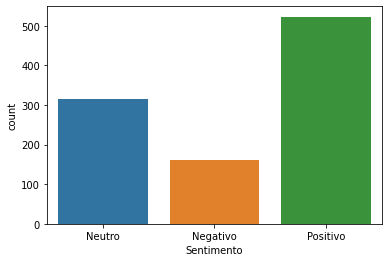

In [52]:
# Graficando con seaborn
sns.countplot(df['Sentimento'])

#### Extraccion de Palabras Clave
+ Para Sentimiento Positivos y Negativos
+ General

In [53]:
positive_tweet = df[df['Sentimento'] == 'Positivo']['clean_tweet']

In [54]:
positive_tweet

3      Exclusive: holds strong in 2020 among duespayi...
4       I noticed that in many localities of old city...
6      Agree UK MSM full of Easter bonhomie amp decou...
8      2/2 It will connect on Tue Thu amp Sat We are ...
10     Read my latest review paper on and published w...
                             ...                        
994    40+ eligible for vaccine in starting today app...
995    Uganda has been very successful at fighting by...
996     And was sooo distracted by his multiple affai...
997     Work from home has changed our lifestyles How...
998    Stop the video and let us know what you miss t...
Name: clean_tweet, Length: 523, dtype: object

In [55]:
neutral_tweet = df[df['Sentimento'] == 'Neutro']['clean_tweet']
negative_tweet = df[df['Sentimento'] == 'Negativo']['clean_tweet']

In [56]:
# Removiendo Stopwords y convirtiendo en Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [57]:
positive_tweet_list

['Exclusive: holds strong 2020 duespaying members despite scandals involving 2 past presidents Strike fund',
 'noticed localities old city waiting authority remove garbage pandemic responsibility Abide protocols',
 'Agree UK MSM Easter bonhomie amp decoupled reality chaos France lapping shores amp schools closing edict masses office Timeout/Regroup',
 '2/2 connect Tue Thu amp Sat thankful esteemed amp responsible passengers following safety protocol🙏 State Govt extended support',
 'Read latest review paper published',
 'casual lucky country running luck withdraw Masks head colder months indoor crowd contact Easter festivals amp shows approaching Bogans won’t MaskUp mandated',
 'Thats supposedly got wrong🤷🏾\u200d♂️ said 🤷🏾\u200d♂️but wont happened court today Clearly losing grip things Wont long now😜',
 'told hurry needs responsibilty lost citizens lives',
 'unpopular opinion happy continue learning remotely means COVID spike cases return normality bit quicker 🤷🏻\u200d♂️',
 'role play h

In [58]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [59]:
# Tokenizacion
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
pos_tokens

['Exclusive:',
 'holds',
 'strong',
 '2020',
 'duespaying',
 'members',
 'despite',
 'scandals',
 'involving',
 '2',
 'past',
 'presidents',
 'Strike',
 'fund',
 'noticed',
 'localities',
 'old',
 'city',
 'waiting',
 'authority',
 'remove',
 'garbage',
 'pandemic',
 'responsibility',
 'Abide',
 'protocols',
 'Agree',
 'UK',
 'MSM',
 'Easter',
 'bonhomie',
 'amp',
 'decoupled',
 'reality',
 'chaos',
 'France',
 'lapping',
 'shores',
 'amp',
 'schools',
 'closing',
 'edict',
 'masses',
 'office',
 'Timeout/Regroup',
 '2/2',
 'connect',
 'Tue',
 'Thu',
 'amp',
 'Sat',
 'thankful',
 'esteemed',
 'amp',
 'responsible',
 'passengers',
 'following',
 'safety',
 'protocol🙏',
 'State',
 'Govt',
 'extended',
 'support',
 'Read',
 'latest',
 'review',
 'paper',
 'published',
 'casual',
 'lucky',
 'country',
 'running',
 'luck',
 'withdraw',
 'Masks',
 'head',
 'colder',
 'months',
 'indoor',
 'crowd',
 'contact',
 'Easter',
 'festivals',
 'amp',
 'shows',
 'approaching',
 'Bogans',
 'won’t',
 'M

In [61]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [62]:
# Obteniendo las palabras claves mas comunes
from collections import Counter

In [63]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [64]:
#Ejemplo llamar a la funcion
get_tokens(pos_tokens)

{'new': 75,
 'amp': 71,
 'cases': 62,
 'people': 47,
 'vaccine': 44,
 'COVID19': 38,
 'pandemic': 37,
 'deaths': 32,
 'today': 27,
 'health': 24,
 'safe': 24,
 'Read': 21,
 'March': 21,
 'positive': 21,
 'latest': 19,
 'lockdown': 19,
 'COVID': 18,
 'vaccines': 18,
 'New': 18,
 'Covid': 17,
 'like': 17,
 'number': 17,
 'countries': 17,
 'country': 16,
 'need': 16,
 'information': 16,
 'year': 16,
 'day': 16,
 'world': 16,
 'protect': 16}

In [65]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [66]:
# Generando DF de Negativos
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df

,words,scores
0,people,27
1,amp,23
2,—,20
3,cases,17
4,pandemic,13
5,vaccine,12
6,spread,11
7,daily,11
8,year,11
9,2020,10


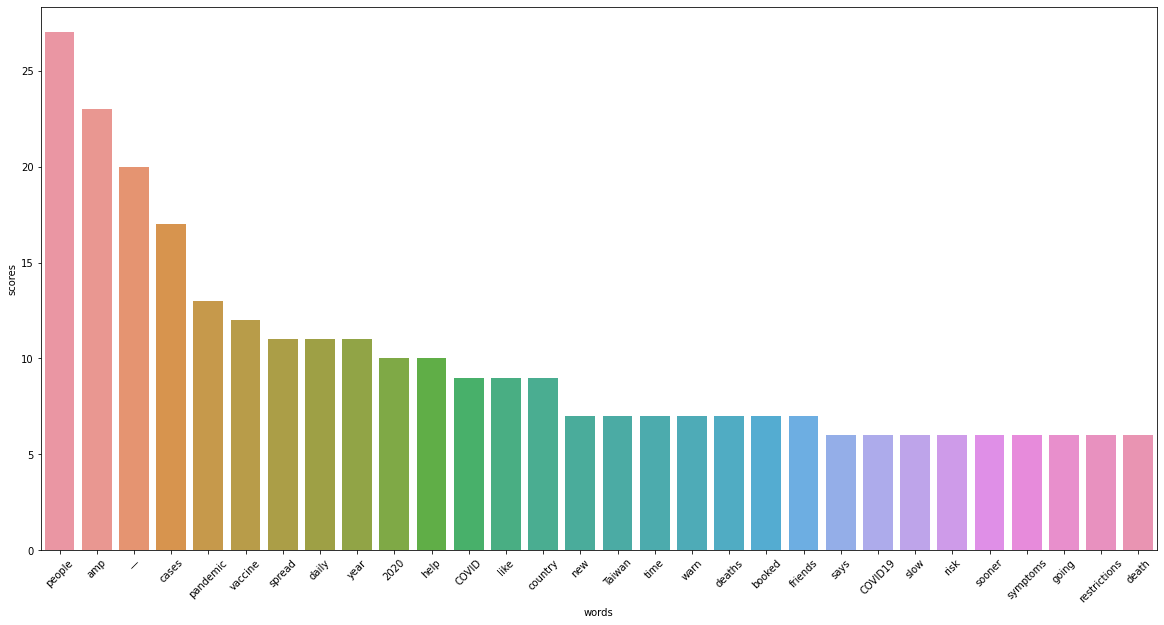

In [67]:
#Graficando con seaborn
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

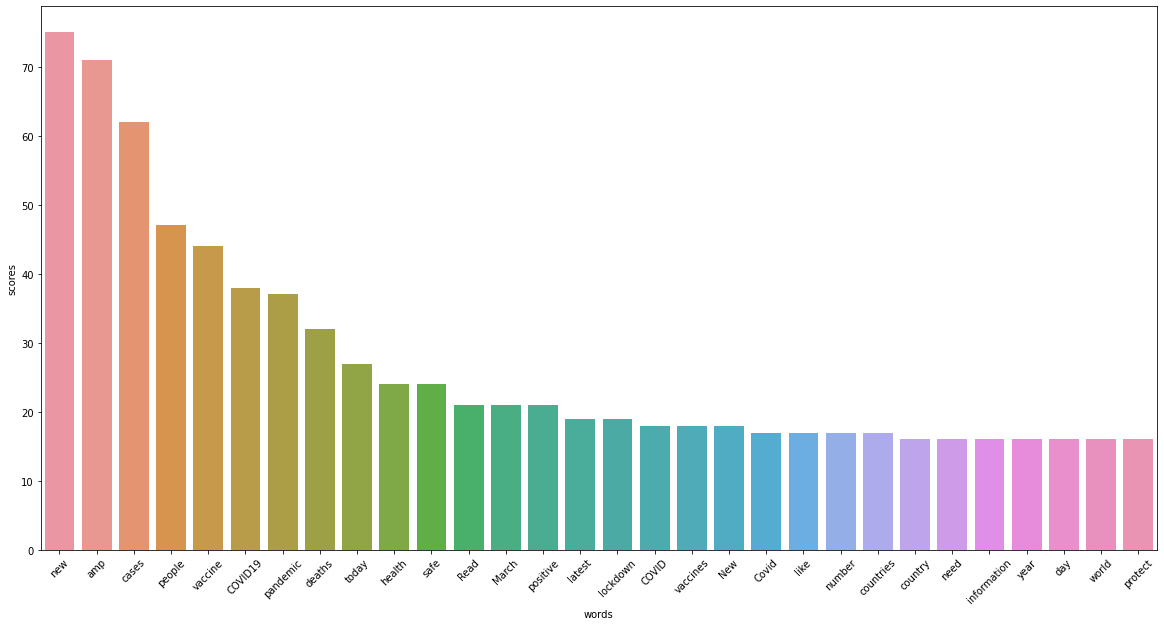

In [68]:
# Generando DF de Positivos y graficando con seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

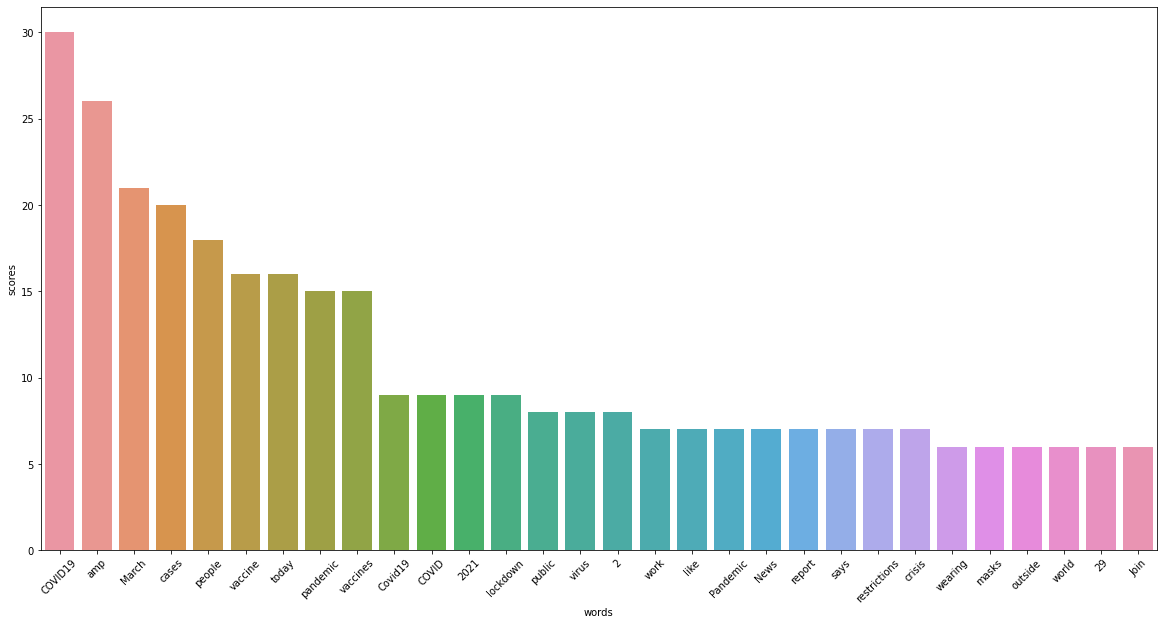

In [69]:
# Generando DF de Neutros y graficando con seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [71]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [72]:
### Word Cloud
from wordcloud import WordCloud

In [73]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [74]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

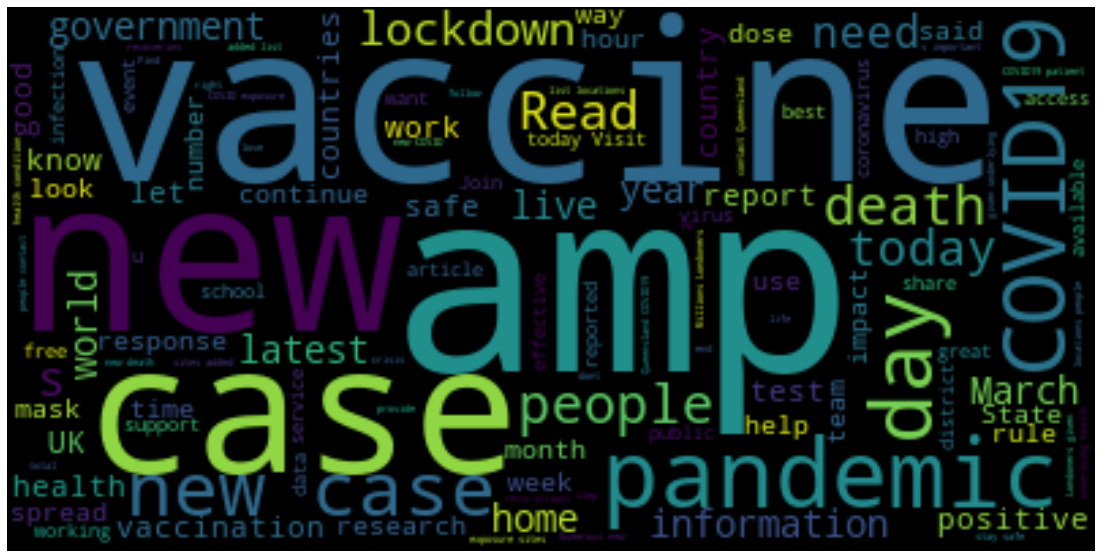

In [75]:
#Positivos
plot_wordcloud(pos_docx)

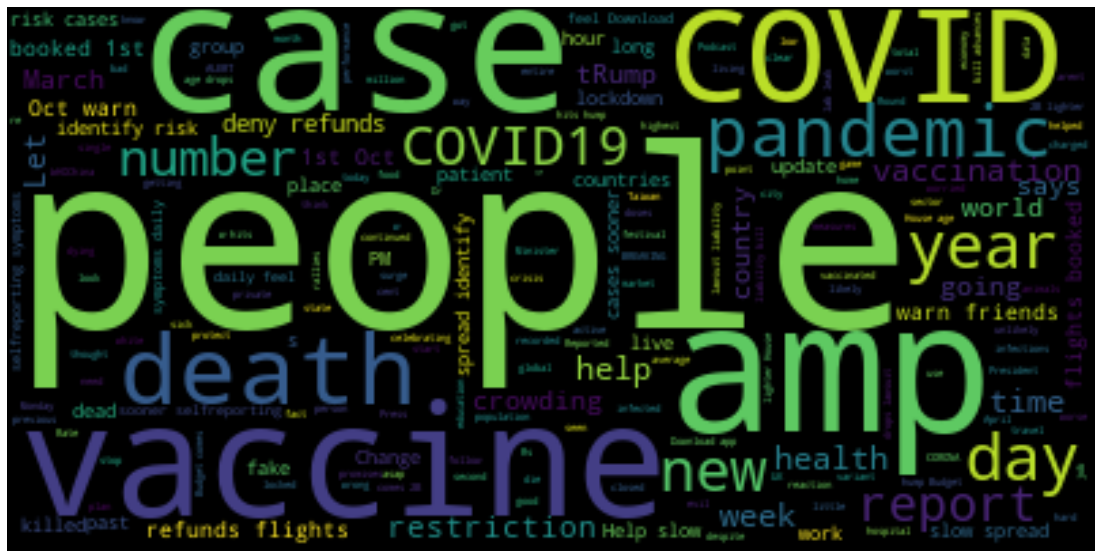

In [76]:
#Negativos
plot_wordcloud(neg_docx)

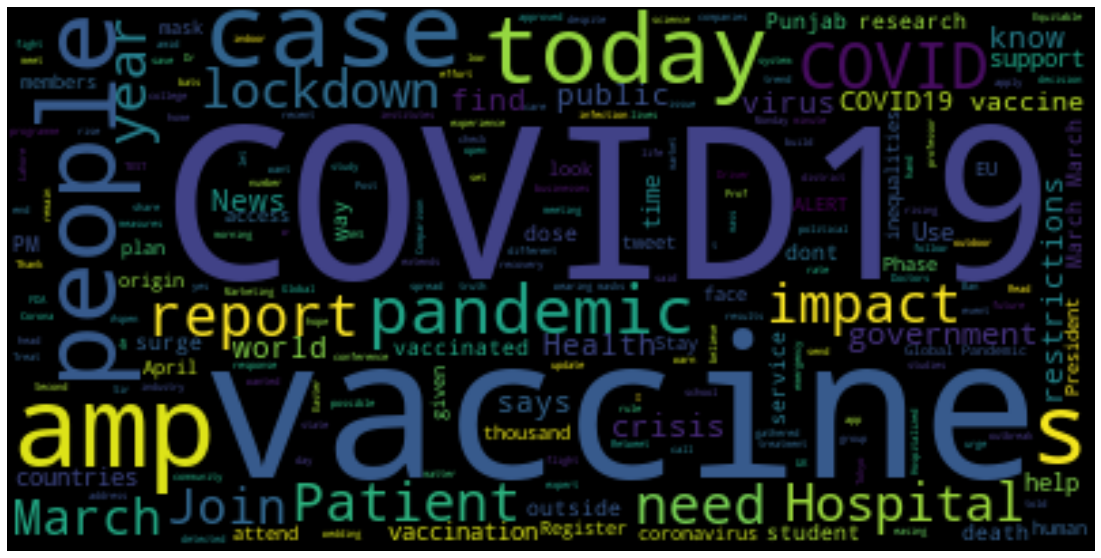

In [77]:
#Neutros
plot_wordcloud(neu_docx)